In [6]:
import math
import tensorflow as tf
import numpy as np
#from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
#import os
from collections import Counter

from sklearn.model_selection import train_test_split

from data_manager import load_dataset

In [2]:
def load_dataset2(n_batches=10):
    imgs = []
    labels = []
    int2sym = np.load("data/int2sym.npy")
    for batch_i in range(n_batches):
        img_batch = np.load("data/imgs_batch_{}.npy".format(batch_i))
        labels_batch = np.load("data/labels_batch_{}.npy".format(batch_i))
        imgs.append(img_batch)
        labels.append(labels_batch)
        
    return np.concatenate(imgs), np.concatenate(labels), int2sym

In [3]:
imgs, labels, int2sym = load_dataset(10)

theta


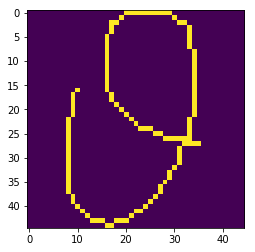

In [5]:
test_ind = 70000
plt.imshow(imgs[test_ind])
print(int2sym[labels[test_ind]])

In [32]:
tf.reset_default_graph()

n_symbols = 82

inputs = tf.placeholder(tf.float32, shape=[None, 45,45])
inputs_flatten = tf.reshape(inputs, shape=[-1,45*45])
targets = tf.placeholder(tf.int32, shape=[None])

targets_onehot = tf.one_hot(targets, n_symbols)

#h1 = tf.layers.dense(inputs_flatten, 3000, activation=tf.nn.relu)
h2 = tf.layers.dense(inputs_flatten, 1000, activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 500, activation=tf.nn.relu)
logits = tf.layers.dense(h3, n_symbols)
output = tf.nn.softmax(logits)

sc = tf.nn.softmax_cross_entropy_with_logits(labels=targets_onehot, logits=logits)

cost = tf.reduce_mean(sc)

optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(targets_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, train_size=0.8)

In [36]:
epochs = 1000

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for e in range(epochs):
    
    #for X,y in []:
    
    loss_value, _ = sess.run([cost, optimizer], feed_dict={
        inputs: X_train,
        targets: y_train
    })

    
    acc_value = sess.run([accuracy], feed_dict={
        inputs: X_test,
        targets: y_test
    })
    
    print(e, loss_value, acc_value)
    

0 4.76257 [0.1061828]
1 5.31027 [0.077956989]
2 6.24637 [0.040322579]
3 6.49684 [0.036290321]
4 5.83493 [0.044354837]
5 5.36574 [0.094086021]
6 5.04584 [0.065860212]
7 4.69196 [0.065860212]
8 4.40479 [0.1061828]
9 4.41026 [0.1061828]
10 4.22733 [0.055107526]
11 4.01905 [0.086021505]
12 3.9273 [0.094086021]
13 3.86188 [0.094086021]
14 3.79884 [0.077956989]
15 3.75356 [0.077956989]
16 3.72906 [0.077956989]
17 3.7139 [0.10752688]
18 3.71227 [0.1061828]
19 3.71189 [0.1061828]
20 3.70053 [0.11290322]
21 3.68937 [0.10080645]
22 3.67953 [0.13037634]
23 3.67391 [0.11827957]
24 3.66392 [0.1061828]
25 3.65173 [0.11155914]
26 3.64627 [0.13844086]
27 3.64329 [0.14650537]
28 3.63823 [0.11962365]
29 3.63066 [0.10752688]
30 3.62467 [0.1061828]
31 3.6209 [0.11021505]
32 3.61703 [0.11693548]
33 3.61325 [0.13172042]
34 3.60894 [0.14112903]
35 3.60319 [0.14247312]
36 3.59853 [0.13978495]
37 3.59462 [0.13306452]
38 3.5901 [0.12768817]
39 3.58603 [0.12634408]
40 3.58283 [0.13172042]
41 3.57958 [0.13978495]

334 0.948068 [0.63709676]
335 0.945023 [0.63440859]
336 0.940272 [0.63844085]
337 0.935122 [0.63709676]
338 0.932506 [0.63306451]
339 0.928431 [0.63575268]
340 0.923376 [0.63978493]
341 0.919853 [0.63978493]
342 0.916614 [0.63978493]
343 0.912332 [0.64112902]
344 0.908269 [0.6424731]
345 0.904652 [0.63978493]
346 0.90012 [0.64112902]
347 0.896168 [0.63844085]
348 0.892688 [0.64112902]
349 0.888844 [0.63978493]
350 0.884592 [0.64381719]
351 0.88084 [0.64381719]
352 0.877152 [0.64112902]
353 0.873154 [0.6424731]
354 0.869586 [0.6424731]
355 0.866123 [0.64381719]
356 0.862365 [0.63978493]
357 0.858773 [0.63978493]
358 0.855643 [0.63844085]
359 0.852949 [0.63844085]
360 0.850987 [0.63844085]
361 0.850932 [0.64381719]
362 0.853848 [0.64112902]
363 0.863438 [0.63037634]
364 0.881915 [0.63172042]
365 0.918821 [0.62365592]
366 0.968281 [0.60483873]
367 1.01746 [0.61962366]
368 0.976445 [0.63306451]
369 0.886396 [0.63440859]
370 0.872942 [0.61693549]
371 0.952619 [0.61559141]
372 0.980143 [0.61

653 0.307868 [0.67338711]
654 0.306449 [0.67204303]
655 0.30504 [0.67204303]
656 0.30368 [0.67204303]
657 0.302373 [0.67204303]
658 0.301084 [0.67069894]
659 0.299778 [0.67204303]
660 0.298434 [0.67204303]
661 0.297062 [0.67338711]
662 0.295689 [0.67204303]
663 0.29433 [0.67204303]
664 0.292992 [0.67338711]
665 0.291668 [0.67204303]
666 0.290372 [0.67473119]
667 0.289089 [0.67204303]
668 0.287824 [0.67607528]
669 0.28658 [0.67069894]
670 0.285351 [0.67607528]
671 0.284141 [0.67204303]
672 0.282927 [0.67473119]
673 0.28169 [0.67069894]
674 0.280388 [0.67473119]
675 0.279025 [0.67204303]
676 0.277625 [0.67473119]
677 0.276213 [0.67607528]
678 0.274836 [0.67741936]
679 0.273501 [0.67741936]
680 0.272208 [0.67607528]
681 0.270962 [0.67741936]
682 0.269734 [0.67473119]
683 0.268559 [0.67607528]
684 0.267417 [0.67473119]
685 0.266346 [0.67741936]
686 0.265329 [0.67338711]
687 0.264374 [0.67473119]
688 0.263385 [0.67069894]
689 0.262295 [0.67338711]
690 0.26096 [0.67473119]
691 0.259431 [0.67

973 0.187048 [0.66666669]
974 0.18576 [0.66801077]
975 0.184467 [0.66935486]
976 0.183138 [0.66935486]
977 0.181797 [0.66801077]
978 0.180456 [0.66935486]
979 0.179147 [0.67069894]
980 0.177884 [0.66935486]
981 0.176668 [0.67069894]
982 0.175444 [0.66801077]
983 0.174198 [0.66801077]
984 0.172865 [0.66935486]
985 0.171489 [0.67069894]
986 0.170121 [0.67069894]
987 0.168824 [0.67069894]
988 0.16762 [0.67069894]
989 0.166487 [0.67069894]
990 0.165384 [0.67204303]
991 0.164276 [0.67069894]
992 0.163148 [0.67338711]
993 0.162013 [0.67069894]
994 0.160882 [0.67338711]
995 0.159788 [0.67204303]
996 0.158723 [0.66935486]
997 0.157685 [0.67338711]
998 0.156621 [0.66935486]
999 0.155537 [0.67473119]


In [37]:
type(sess)

tensorflow.python.client.session.Session

In [51]:
%time valid_imgs, valid_labels = load_data(100,89)

Wall time: 30.9 s


In [54]:
acc_value = sess.run([accuracy], feed_dict={
    inputs: valid_imgs,
    targets: valid_labels
})

print(acc_value)

[0.27607527]


In [53]:
valid_imgs

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ..., 
       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, 

In [55]:
np.save("imgs", valid_imgs)